In [1]:
import numpy as np
import sklearn.linear_model as linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import Coordinate_Descent

## Data Generation

In [2]:
n_samples, n_features = 50, 200
nonzeros = 10 # nonzeros=10
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)

coef[inds[nonzeros:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

## sklearn Lasso

Lasso(alpha=0.1)
number of iterations: 399
Sparsity of coef: 89.0 %
Intercept: -0.8560123140370536
r^2 on test data : 0.6300543284989284


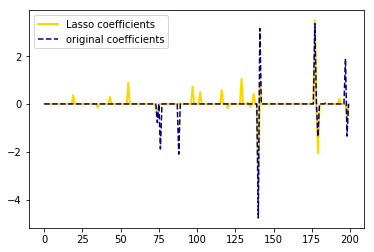

In [3]:
alpha = 0.1
lasso = linear_model.Lasso(alpha=alpha, fit_intercept=True, normalize=False)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print('number of iterations: {}'.format(lasso.n_iter_))
print('Sparsity of coef: {} %'.format(np.mean(lasso.coef_ == 0) * 100))
print('Intercept: {}'.format(lasso.intercept_))
print('r^2 on test data : {}'.format(r2_score_lasso))

plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend()

## Coordinate_Descent

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, selection='cyclic', tol=1e-05)
number of iterations: 245
Sparsity of coef: 90.5 %
Intercept: -1.3146215697328274
r^2 on test data : 0.769494552967115


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Objective')

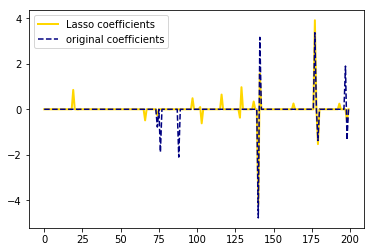

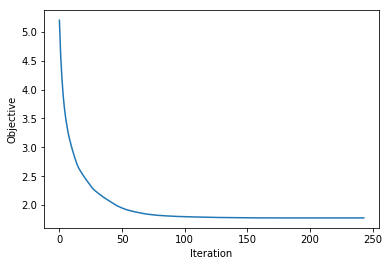

In [5]:
alpha = 0.1
lasso = Coordinate_Descent.Lasso(alpha=alpha, fit_intercept=True, normalize=True)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print('number of iterations: {}'.format(lasso.n_iter_))
print('Sparsity of coef: {} %'.format(np.mean(lasso.coef_ == 0) * 100))
print('Intercept: {}'.format(lasso.intercept_))
print('r^2 on test data : {}'.format(r2_score_lasso))

plt.figure(1)
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend()

plt.figure(2)
objectives = lasso.objectives_
plt.plot(objectives)
plt.xlabel('Iteration')
plt.ylabel('Objective')